In [42]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# 교자검증
from sklearn.model_selection import cross_val_score
# 분리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
train = pd.read_csv("./data/train.csv", index_col='no')
train
test = pd.read_csv("./data/test.csv", index_col='no')
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States


In [44]:
train.info()
# test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [45]:
# int
train['age'].unique()
train['fnlwgt'].unique()
train['education-num'].unique()
train['capital-gain'].unique()
train['capital-loss'].unique()
train['hours-per-week'].unique()

# Object
train['education'].unique()
train['marital-status'].unique()
train['relationship'].unique()
train['race'].unique()
train['sex'].unique()


# '?' 있는 컬럼
train['workclass'].unique()
train['occupation'].unique()
train['native-country'].unique()


array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' ?', ' Germany', ' Peru', ' Ecuador', ' Iran',
       ' Thailand', ' Dominican-Republic', ' Poland', ' Scotland',
       ' Italy', ' Jamaica', ' China', ' Portugal', ' Columbia',
       ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [46]:
# int
test['age'].unique()
test['fnlwgt'].unique()
test['education-num'].unique()
test['capital-gain'].unique()
test['capital-loss'].unique()
test['hours-per-week'].unique()

# object
test['education'].unique()
test['marital-status'].unique()
test['relationship'].unique()
test['race'].unique()
test['sex'].unique()


# '?' 있는 컬럼
test['workclass'].unique()
test['occupation'].unique()
test['native-country'].unique()

array([' United-States', ' Puerto-Rico', ' Portugal', ' ?',
       ' El-Salvador', ' Iran', ' India', ' Philippines', ' Vietnam',
       ' Cuba', ' Italy', ' Hungary', ' Jamaica', ' Germany', ' Mexico',
       ' England', ' Columbia', ' China', ' Nicaragua', ' Taiwan',
       ' Scotland', ' Ireland', ' Poland', ' South', ' France',
       ' Guatemala', ' Japan', ' Canada', ' Ecuador',
       ' Dominican-Republic', ' Yugoslavia', ' Haiti', ' Greece',
       ' Outlying-US(Guam-USVI-etc)', ' Laos', ' Trinadad&Tobago',
       ' Thailand', ' Peru', ' Honduras', ' Hong', ' Cambodia'],
      dtype=object)

In [47]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [48]:
# 문자열 데이터 앞 공백 제거
df = train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
df = df.apply(lambda x: x.str.strip(), axis=1)
train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']] = df

df = test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
df = df.apply(lambda x: x.str.strip(), axis=1)
test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']] = df

<AxesSubplot:xlabel='native-country', ylabel='count'>

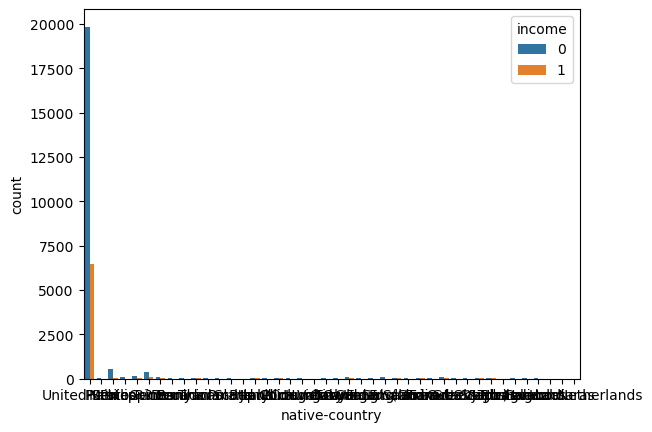

In [8]:
# plt.ylim(0,1000)
plt.xlabel
sns.countplot(data=train,x='native-country',hue='income')

In [9]:
# pt1.index
print(set(test['native-country'].unique()) - set(train['native-country'].unique()))

# test train 컬럼 동일

set()


In [50]:
# train['native-country'] 레이블 인코딩
train['native-country'].value_counts()

# train['income'][train['native-country']=='United-States'].value_counts()\
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['native-country'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1
df = {'India':1, 'Hungary':2, 'Japan':3, 'England':4, 'Canada':5, 'Iran':6, 'Italy':7,
       'Greece':8, 'Ireland':9, 'Germany':10, 'Cambodia':11, 'Taiwan':12, 'Yugoslavia':13,
       'France':14, 'Philippines':15, 'China':16, 'United-States':17, '?':18, 'Cuba':19, 'Hong':20,
       'Ecuador':21, 'South':22, 'Portugal':23, 'Poland':24, 'Thailand':25, 'Jamaica':26, 'Peru':27,
       'Scotland':28, 'Puerto-Rico':29, 'Honduras':30, 'Haiti':31, 'Laos':32,
       'Outlying-US(Guam-USVI-etc)':33, 'Mexico':34, 'El-Salvador':35,
       'Dominican-Republic':36, 'Guatemala':37, 'Columbia':38, 'Nicaragua':39, 'Vietnam':40,
       'Trinadad&Tobago':41, 'Holand-Netherlands':42 }


label_train = train['native-country']
label_train.unique()

pt1 = label_train.map(df)
pt1
train['native-country'] = pt1
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,17,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,17,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,31,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,17,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,29,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,17,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,17,0


In [51]:
# test['native-country'] 레이블 인코딩
df = {'India':1, 'Hungary':2, 'Japan':3, 'England':4, 'Canada':5, 'Iran':6, 'Italy':7,
       'Greece':8, 'Ireland':9, 'Germany':10, 'Cambodia':11, 'Taiwan':12, 'Yugoslavia':13,
       'France':14, 'Philippines':15, 'China':16, 'United-States':17, '?':18, 'Cuba':19, 'Hong':20,
       'Ecuador':21, 'South':22, 'Portugal':23, 'Poland':24, 'Thailand':25, 'Jamaica':26, 'Peru':27,
       'Scotland':28, 'Puerto-Rico':29, 'Honduras':30, 'Haiti':31, 'Laos':32,
       'Outlying-US(Guam-USVI-etc)':33, 'Mexico':34, 'El-Salvador':35,
       'Dominican-Republic':36, 'Guatemala':37, 'Columbia':38, 'Nicaragua':39, 'Vietnam':40,
       'Trinadad&Tobago':41, 'Holand-Netherlands':42 }


label_test = test['native-country']
label_test.unique()

pt1 = label_test.map(df)
pt1
test['native-country'] = pt1
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,17
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,17
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,17
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,17
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,17
48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,17
48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,17


In [53]:
train['native-country'].unique()

array([17, 31, 34, 29, 15, 18, 10, 27, 21,  6, 25, 36, 24, 28,  7, 26, 16,
       23, 38,  2, 40, 12,  5, 20, 37, 35,  4, 33,  1, 14, 19,  8, 41, 22,
        3, 13, 39,  9, 11, 32, 30, 42], dtype=int64)

In [54]:
print(set(test['race'].unique()) - set(train['race'].unique()))

set()


In [55]:
train['race'].value_counts()

# train['income'][train['native-country']=='United-States'].value_counts()\
pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['race'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1

,income
race,
White,0.255851
Asian-Pac-Islander,0.255713
Amer-Indian-Eskimo,0.124138
Black,0.118516
Other,0.117155


In [56]:
train['race'].unique()
df = {'White':1, 'Asian-Pac-Islander':1, 'Black':2, 'Amer-Indian-Eskimo':2,
       'Other':2}

label_train = train['race']
label_train.unique()

pt1 = label_train.map(df)
pt1
train['race'] = pt1
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,1,Male,0,0,40,17,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,1,Female,0,1721,55,17,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,1,Female,0,0,50,31,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,1,Female,0,0,40,17,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,1,Male,0,0,70,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,2,Male,0,0,40,29,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,2,Male,0,0,40,17,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,1,Male,0,0,40,17,0


In [57]:
test['race'].unique()
df = {'White':1, 'Asian-Pac-Islander':1, 'Black':2, 'Amer-Indian-Eskimo':2,
       'Other':2}

label_test = test['race']
label_test
pt1 = label_test.map(df)
pt1
test['race'] = pt1
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,1,Male,0,0,16,17
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,1,Female,0,0,40,17
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,2,Male,0,0,40,17
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,Male,0,0,40,17
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,1,Female,0,1902,40,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,1,Male,0,0,60,17
48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,1,Female,0,0,50,17
48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,1,Male,4386,0,40,17


In [58]:
# 결혼 상태
train['marital-status'].unique()
train['education'] = train['education'].str.strip()
train['education'].unique()

array(['11th', 'Some-college', 'Bachelors', 'Assoc-voc', '9th', 'HS-grad',
       'Masters', '5th-6th', 'Prof-school', '12th', '10th', 'Assoc-acdm',
       'Doctorate', '7th-8th', '1st-4th', 'Preschool'], dtype=object)

<AxesSubplot:xlabel='education', ylabel='count'>

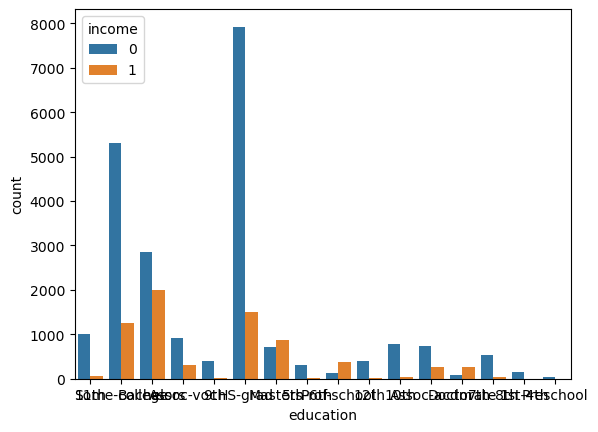

In [59]:
sns.countplot(data=train,x='education',hue='income')

In [19]:
# ++
train.corr()

,age,fnlwgt,education-num,race,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,-0.075753,0.035084,-0.030907,0.078498,0.054413,0.073100,-0.054281,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,0.095051,-0.005051,-0.001513,-0.010154,0.105003,-0.002994
education-num,0.035084,-0.030600,1.000000,-0.089585,0.127651,0.083925,0.147569,-0.231152,0.331798
race,-0.030907,0.095051,-0.089585,1.000000,-0.021266,-0.021693,-0.046601,0.052061,-0.101364
capital-gain,0.078498,-0.005051,0.127651,-0.021266,1.000000,-0.031401,0.088609,-0.027155,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.021693,-0.031401,1.000000,0.055271,-0.017238,0.135645
hours-per-week,0.073100,-0.010154,0.147569,-0.046601,0.088609,0.055271,1.000000,-0.018042,0.231045
native-country,-0.054281,0.105003,-0.231152,0.052061,-0.027155,-0.017238,-0.018042,1.000000,-0.100510
income,0.238460,-0.002994,0.331798,-0.101364,0.221387,0.135645,0.231045,-0.100510,1.000000


In [20]:
train['education-num'].unique()

array([ 7, 10, 13, 11,  5,  9, 14,  3, 15,  8,  6, 12, 16,  4,  2,  1],
      dtype=int64)

In [60]:
X_train = train.loc[:,:'native-country']
y_train = train['income']
X_test = test

In [61]:
X_train = pd.get_dummies(X_train)
X_train
X_test = pd.get_dummies(X_test)
X_test

,age,fnlwgt,education-num,race,capital-gain,capital-loss,hours-per-week,native-country,workclass_?,workclass_Federal-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
no,,,,,,,,,,,,,,,,,,,,,
29306,18,245274,10,1,0,0,16,17,1,0,...,0,0,0,0,0,1,0,0,0,1
29307,29,83003,9,1,0,0,40,17,0,0,...,0,0,0,0,0,0,0,1,1,0
29308,45,35136,13,2,0,0,40,17,0,0,...,1,0,1,0,0,0,0,0,0,1
29309,42,64631,13,1,0,0,40,17,0,0,...,0,0,1,0,0,0,0,0,0,1
29310,41,195821,16,1,0,1902,40,17,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,116789,9,1,0,0,60,17,0,0,...,0,0,1,0,0,0,0,0,0,1
48839,48,185079,9,1,0,0,50,17,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,63,117473,10,1,4386,0,40,17,0,0,...,0,0,1,0,0,0,0,0,0,1


In [62]:
print("훈련용 문제 :",X_train.shape)
print("훈련용 문제 :",y_train.shape)
print("데스트용 문제 :",X_test.shape)

훈련용 문제 : (29305, 63)
훈련용 문제 : (29305,)
데스트용 문제 : (19537, 63)


In [63]:
tree_model1 = DecisionTreeClassifier(max_depth=9)
res = cross_val_score(tree_model1,X_train,y_train,cv=5)
res
res.mean()
# 0.8527213786043337

0.8528578740829209

In [25]:
tree_model1.fit(X_train,y_train)

pre1 = tree_model1.predict(X_test)
pre1

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [26]:
model=KNeighborsClassifier(n_neighbors=4)

res = cross_val_score(model,X_train,y_train,cv=5)
res
res.mean()

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.7865210714895069

In [27]:
result = pd.read_csv("./data/sample_submission.csv")
result

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [28]:
# result['income'] = pre1
# result.to_csv('./data/phy02.csv', index=False)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [69]:
start_time = time.time()
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

res = cross_val_score(gb,X_train,y_train,cv=7)
res
res.mean()

# 7, 23 : 0.8660296877665926
# 0 : 0.8660638116362396
# 50, cv=8 : 0.8660637115877291


0.866097715892333

In [31]:
pred = gb.predict(X_test)
result = pd.read_csv("./data/sample_submission.csv")
result
result['income'] = pred
result.to_csv('./data/phy02.csv', index=False)

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [32]:
# scaler 불러오기
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [33]:
s_scaler.fit(X_train)
t_X_train = s_scaler.transform(X_train)
t_X_test = s_scaler.transform(X_test)

In [34]:
res = cross_val_score(gb,t_X_train,y_train,cv=5)
res.mean()

0.8658931922880054

In [35]:
pred = gb.predict(t_X_test)
result = pd.read_csv("./data/sample_submission.csv")
# result
# result['income'] = pred
# result.to_csv('./data/phy03.csv', index=False)

In [36]:
# 부스팅 모델 불러오기
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada_model = AdaBoostClassifier(n_estimators=100,random_state=10)

In [38]:
res = cross_val_score(ada_model,X_train,y_train,cv=5)
res.mean()

0.864494113632486

In [39]:
# random forest 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest_model = RandomForestClassifier(n_estimators=100,random_state=7)

In [41]:
res = cross_val_score(forest_model,X_train,y_train,cv=5)
res.mean()

0.8533356082579765

In [ ]:
train['occupation'].unique()

pt1 = train.pivot_table(values='income', #데이터로 사용 할 컬럼 지정
                index=['occupation'], # 데이터 요약시 확인하고 싶은 컬럼
                aggfunc='mean' ) 
pt1 = pt1.sort_values(by='income', ascending=False)
pt1